# 1. Importing Packages

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer
import statsmodels.api as sm

# 2. Importing Dataset

In [2]:
df = pd.read_csv(r"B:\Code\Github Projects\Predict Heart Disease Logistic Regression\framingham.csv")

# 3. EDA and Preprocessing

In [3]:
# EDA.1 -> Checking rows, columns and name of columns, in case there is a need to change column names.
rows, columns = df.shape
print(f'rows: {rows} \n columns: {columns}')
print(df.columns)

rows: 4238 
 columns: 16
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [4]:
# EDA.2 -> Getting statistics summary from data set.
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
# EDA.3 -> Getting a preview from data set
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# EDA.4 -> Checking data types
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

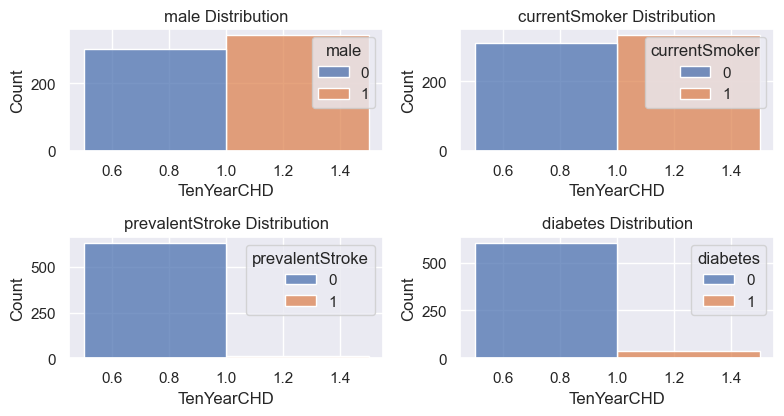

In [7]:
# EDA.5 -> which feature value is more likely to have a 10-year risk of future coronary heart disease
df_disease = df.loc[df['TenYearCHD'] == 1]
some_discrete_features = ["male", "currentSmoker", "prevalentStroke", "diabetes"]


sns.set_theme(rc={'figure.figsize':(8, 8)})
for i, col in enumerate(some_discrete_features):
    plt.subplot(len(some_discrete_features), 2, i+1)
    h = df_disease[col]
    x = df_disease['TenYearCHD']
    sns.histplot(x = x, hue = h, multiple = "dodge")
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

In [8]:
# EDA.6 -> Checking if there are duplicates
df.duplicated().sum()

0

<AxesSubplot:>

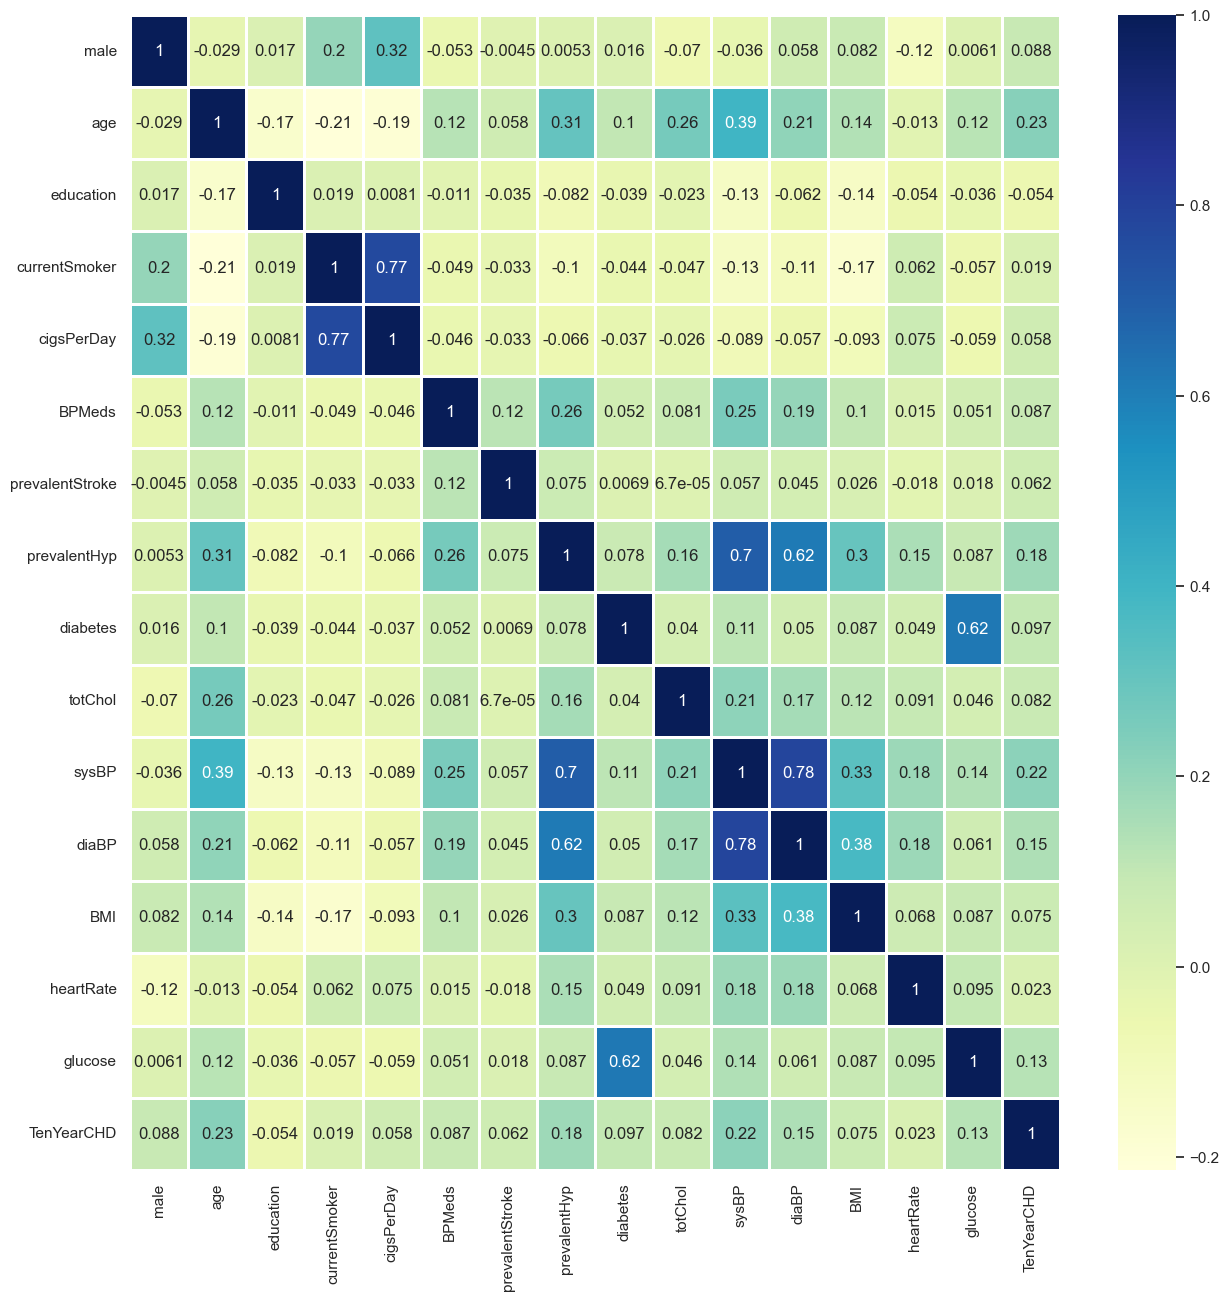

In [9]:
# EDA.7 -> Correlation Checking
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidth=1)

In [10]:
# EDA.8 -> Checking for missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# Cleaning.1 -> Dropping unnecessary columns
df.drop(["education"], axis=1, inplace=True) # useless feature
df.drop(["glucose"], axis=1, inplace=True) # too much missing values and highly correlated with "diabetes" feature

In [12]:
# Defining features and label
x = df.drop(columns=['TenYearCHD'])
y = df[["TenYearCHD"]]

In [13]:
# Normalization 
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.fit_transform(x)
df_normalized = pd.DataFrame(x, columns=df.columns[:-1])

In [14]:
# Cleaning.8 -> Imputing missing values using KNN
knn_imp = KNNImputer(n_neighbors=5)
# imputing each feature with correlated features
imputed_cigsPerDay = knn_imp.fit_transform(df_normalized[["currentSmoker", "cigsPerDay"]])
imputed_BPMeds = knn_imp.fit_transform(df_normalized[["BPMeds", "prevalentHyp", "sysBP"]])
imputed_BMI = knn_imp.fit_transform(df_normalized[["sysBP", "diaBP", "BMI"]])

df_normalized[["currentSmoker", "cigsPerDay"]] = imputed_cigsPerDay
df_normalized[["BPMeds", "prevalentHyp", "sysBP"]] = imputed_BPMeds
df_normalized[["sysBP", "diaBP", "BMI"]] = imputed_BMI

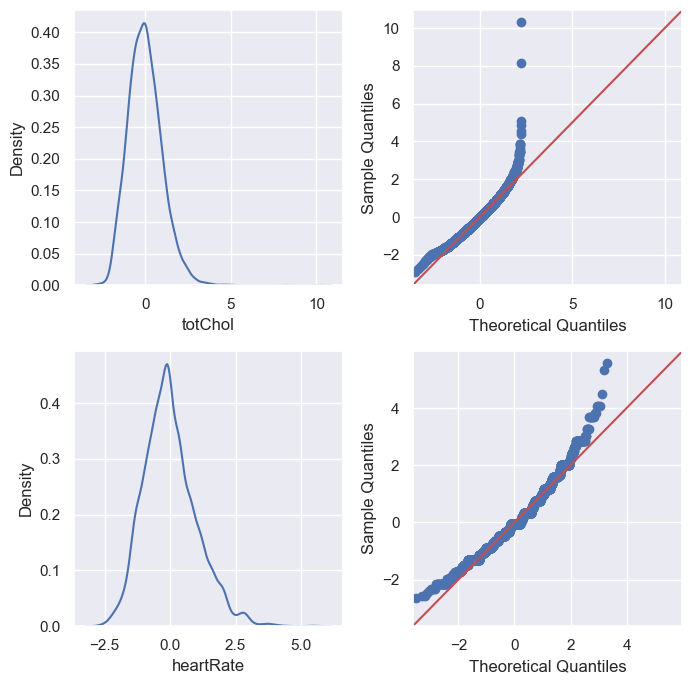

In [15]:
# EDA.9 -> Determining if these 2 features follow normal distribution using quantile-quantile plot

plt.figure(figsize=(7, 7))
for i, col in enumerate(["totChol", "heartRate"]):
    plt.subplot(2, 2, 2*i+1)
    sns.kdeplot(df_normalized[col])
    plt.subplot(2, 2, 2*i+2)
    sm.qqplot(df_normalized[col], line='45', ax=plt.gca())
    
plt.tight_layout()
plt.show()

In [16]:
# Cleaning.9 -> Filling missing values with the median because these features do not follow a normal distribution

df_normalized['totChol'].fillna(df_normalized['totChol'].median(), inplace = True)
df_normalized['heartRate'].fillna(df_normalized['heartRate'].median(), inplace = True)

In [17]:
df_normalized.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
dtype: int64

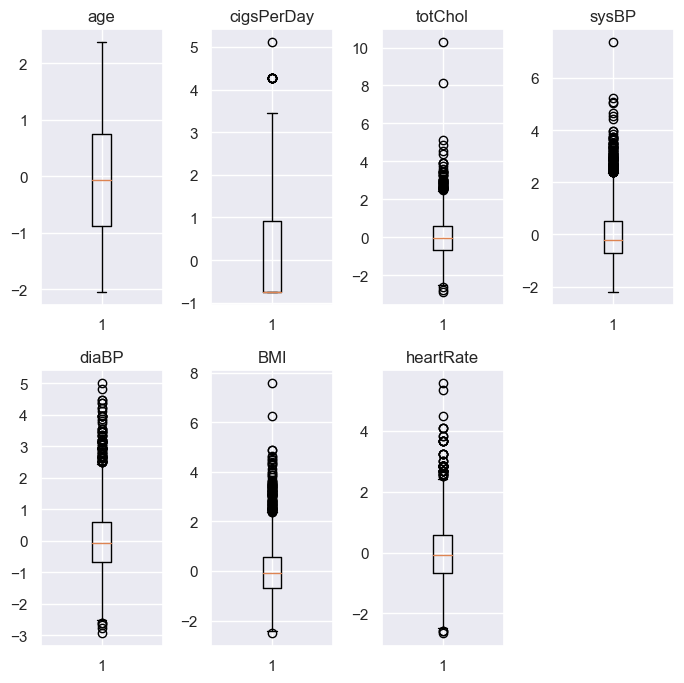

In [18]:
# EDA.10 -> Plotting box plot
non_categorical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate"]


plt.figure(figsize=(7, 7))
for i, col in enumerate(non_categorical_features):
    plt.subplot(2, 4, i+1)
    plt.title(col)
    plt.boxplot(df_normalized[col])

plt.tight_layout()
plt.show()

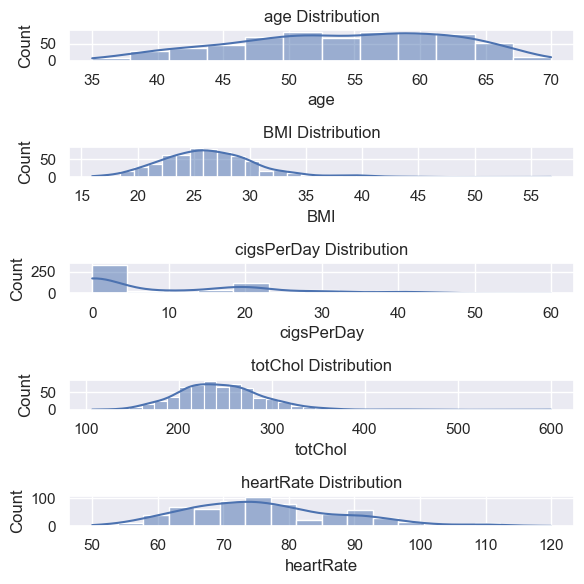

In [19]:
# EDA.11 -> Distribution of different features of patients with a 10-year risk of future coronary heart disease
some_features = ["age", "BMI", "cigsPerDay", "totChol", "heartRate"]

sns.set_theme(rc={'figure.figsize':(6, 6)})
for i, col in enumerate(some_features):
    plt.subplot(len(some_features), 1, i+1)
    sns.histplot(data=df_disease[col], kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

# 4. Splitting data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y, random_state=0)

# 5. Initializing and fitting the Logistic Regression Classifier

In [21]:
LR = LogisticRegression()
LR.fit(X_train, y_train.values.ravel())

LogisticRegression()

# 6. Making predictions

In [22]:
y_pred = LR.predict(X_test)

# 7. Evaluating model performance

In [23]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 83.96%


In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       890
           1       0.50      0.05      0.09       170

    accuracy                           0.84      1060
   macro avg       0.67      0.52      0.50      1060
weighted avg       0.79      0.84      0.78      1060



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 300x300 with 0 Axes>

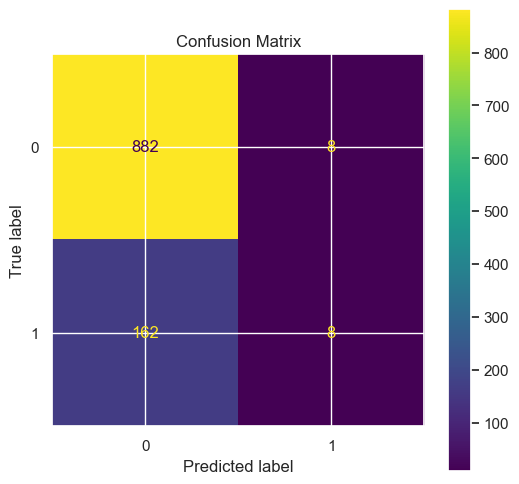

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
plt.figure(figsize=(3, 3))
cm_display.plot()
plt.title("Confusion Matrix")